In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mne
import config
from mne.stats import permutation_cluster_1samp_test
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy
import sgcd.rsa as rsa
import seaborn as sns

/Users/aylinkallmayer/anaconda3/envs/sgcd/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [3]:
pca=True
estimator="SVM"
language="german"
h=12

In [4]:
def load_results(type):
    if type=="al_orig":
        res = np.load("../results/rsa/rsa_results_al_original.npy")
    elif type=="al_white":
        res = np.load("../results/rsa/rsa_results_al_whitened.npy")
    elif type=="la_orig":
        res = np.load("../results/rsa/rsa_results_la_original.npy")
    elif type=="la_white":
        res = np.load("../results/rsa/rsa_results_la_whitened.npy")
    return res

def load_cluster(type):
    if type=="al_orig" or type=="al_white":
        cluster = np.load("../results/good_clusters-al_diff-diagtimes-PCA_True-SVM-1.npy")
        return [cluster]
    elif type=="la_orig" or type=="la_white":
        cluster_1 = np.load(f"../results/good_clusters-la_diff-diagtimes-PCA_{pca}-{estimator}-1.npy")
        cluster_2 = np.load(f"../results/good_clusters-la_diff-diagtimes-PCA_{pca}-{estimator}-2.npy")
        cluster_3 = np.load(f"../results/good_clusters-la_diff-diagtimes-PCA_{pca}-{estimator}-3.npy")
        return [cluster_1, cluster_2, cluster_3]

def data_for_plot(subject_id_clean, good_times_al, good_times_la, pred_type="orig"):
    al, la = [load_results(x) for x in [f"al_{pred_type}",f"la_{pred_type}"]]
    avg_al = al[:,:,good_times_al].mean(axis=2)
    avg_la = la[:,:,good_times_la].mean(axis=2)
    all_res = []
    for s in range(len(subject_id_clean)):
        temp_al = pd.DataFrame(avg_al[s,:], columns=["betas"])
        temp_al["id"] = s+1
        temp_al["coef_name"] = ["SSIM","V1","V2","V4","IT","semantic","phrase co-occ","actions"]
        temp_al["type"] = "AL"
        
        temp_la = pd.DataFrame(avg_la[s,:], columns=["betas"])
        temp_la["id"] = s+1
        temp_la["coef_name"] = ["SSIM","V1","V2","V4","IT","semantic","phrase co-occ","actions"]
        temp_la["type"] = "LA"
        all_res.append(pd.concat([temp_al,temp_la]))
    all_res = pd.concat(all_res)
    return all_res, avg_al, avg_la
    
def data_for_plot(subject_id_clean, good_times_al, good_times_la_1, good_times_la_2, pred_type="orig"):
    al, la = [load_results(x) for x in [f"al_{pred_type}",f"la_{pred_type}"]]
    avg_al = al[:,:,good_times_al].mean(axis=2)
    avg_la_1 = la[:,:,good_times_la_1].mean(axis=2)
    avg_la_2 = la[:,:,good_times_la_2].mean(axis=2)
    avg_la = np.mean(np.stack([avg_la_1,avg_la_2]), axis=0)

    all_res = []
    for s in range(len(subject_id_clean)):
        temp_al = pd.DataFrame(avg_al[s,:], columns=["betas"])
        temp_al["id"] = s+1
        temp_al["coef_name"] = ["SSIM","V1","V2","V4","IT","semantic","phrase co-occ","actions"]
        temp_al["type"] = "AL"
        
        temp_la = pd.DataFrame(avg_la[s,:], columns=["betas"])
        temp_la["id"] = s+1
        temp_la["coef_name"] = ["SSIM","V1","V2","V4","IT","semantic","phrase co-occ","actions"]
        temp_la["type"] = "LA"
        all_res.append(pd.concat([temp_al,temp_la]))
    all_res = pd.concat(all_res)
    return all_res, avg_al, avg_la

### 1. Plot full timecourse

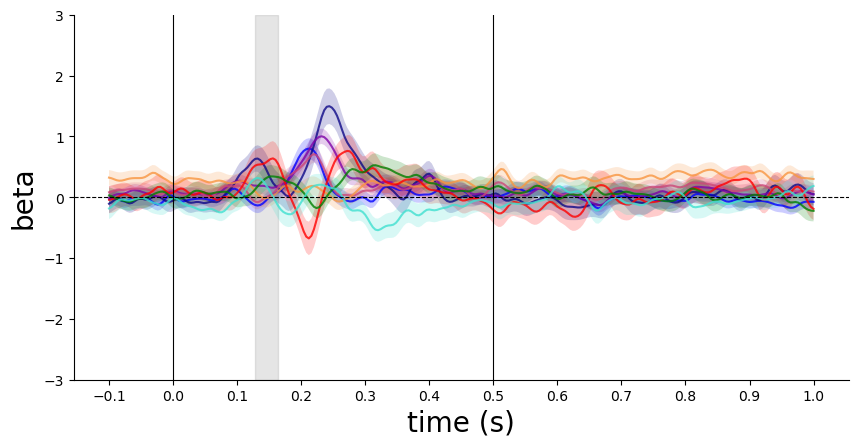

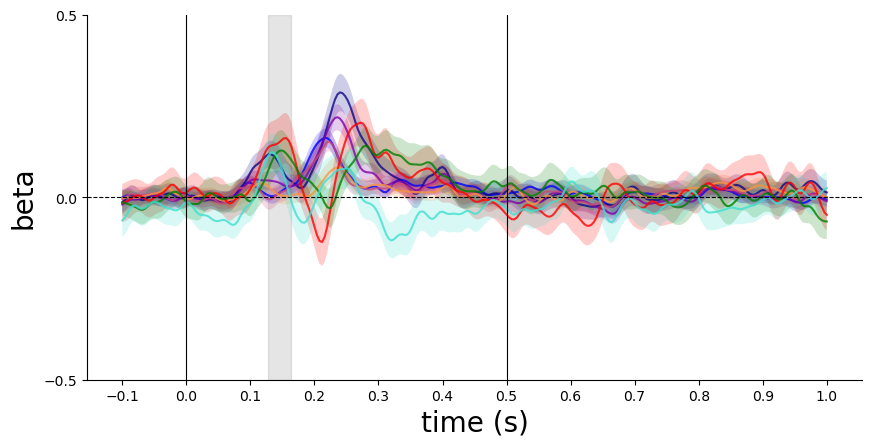

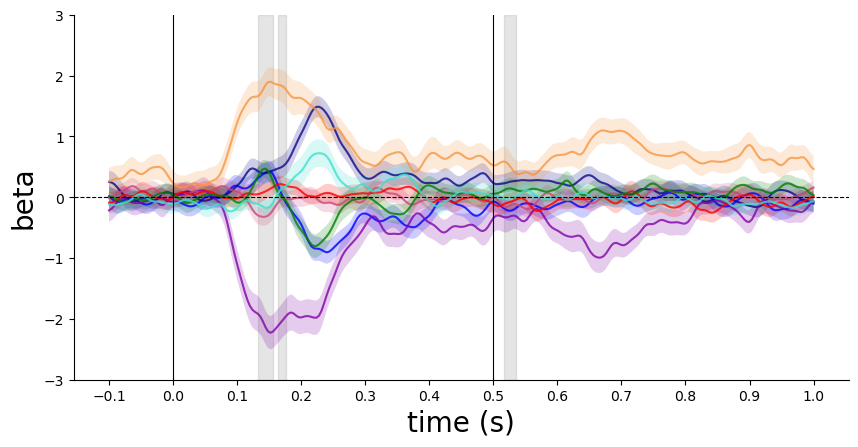

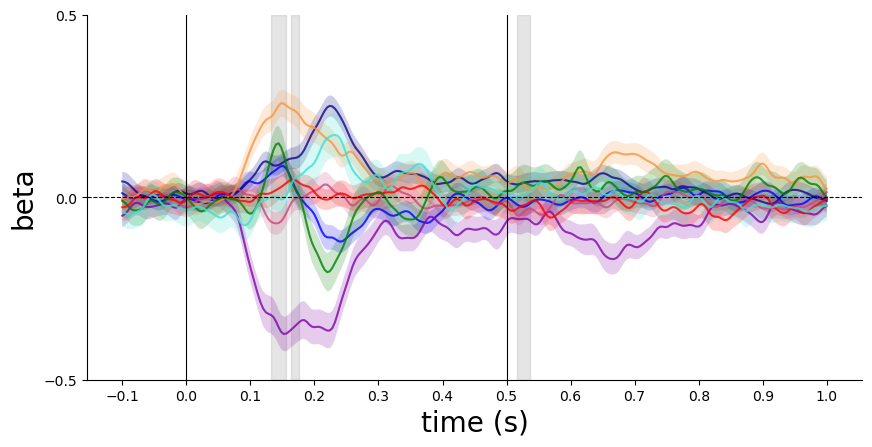

In [7]:
color_vals = rsa.create_cols(5, ["blue","red","green","turquoise"])
times = rsa.get_times("../"+config.eeg_data_dir)
for type_preds in ["al_orig","al_white","la_orig","la_white"]:
    res = load_results(type_preds)
    good_clusters = load_cluster(type_preds)
    fig, ax = plt.subplots(figsize = (10,5)) 
    [ax.axvspan(times[c[0]][0],times[c[0]][-1], color="grey", alpha=0.2) for c in good_clusters]

    for coef in range(res.shape[1]):
        c_val = color_vals[coef]
        ga_scores_smooth,sigma_smooth = rsa.smooth_for_plot(res[:,coef,:])
        
        ax.plot(times, ga_scores_smooth, color=c_val, alpha=.8)
        ax.fill_between(times, ga_scores_smooth+sigma_smooth, ga_scores_smooth-sigma_smooth, facecolor=c_val, alpha=0.2)
        #ax.scatter(epochs.times, coefs_pval[coef], c=colorVal, marker="_", linewidths=2)
        
    rsa.add_plot_configs(ax, type_preds)
    plt.savefig(f'../results/plots/RSA_phrase_{type_preds}-timecourse-PCA_{pca}-{estimator}-{language}_{h}.png', dpi=300)




### 2. Plot avg cluster - early cluster

whitened

Permuting 9999 times...
[6.270e-01 1.000e+00 1.000e-04 3.272e-01 1.000e-04 3.980e-02 9.470e-01
 6.978e-01]


/var/folders/8j/h8w6skpx111fc1wp64yw19kw0000gn/T/ipykernel_48042/1635819177.py:37: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


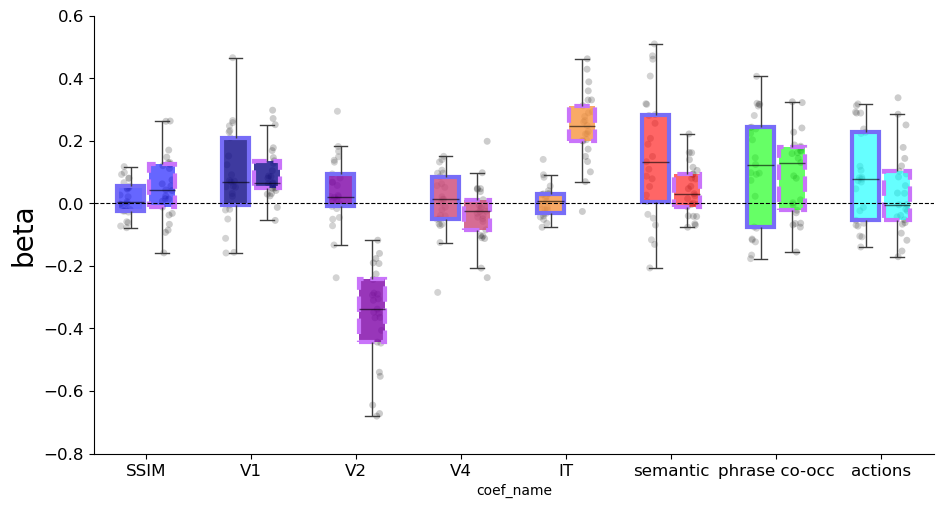

In [8]:
pred_type="white"

all_res, avg_al, avg_la = data_for_plot(config.subject_id_clean, load_cluster("al_orig")[0][0], load_cluster("la_orig")[0][0], load_cluster("la_orig")[1][0], pred_type=pred_type)

colors = rsa.create_cols_all(5,alpha=.8)[:4]

[colors.append(x) for x in [(1, 0, 0, 0.6),(0, 1, 0, 0.6),(0, 1, 1, 0.6)]]
colors.insert(0,(0,0,1,0.6))
colors=colors*2
#5852B6
#776DF7
edgecols = list(np.repeat(["#776DF7","#C974FA"],8))
linestyles = list(np.repeat(["-","--"],8))

diff = (avg_al-avg_la)
t_, pvals, ho_ = mne.stats.permutation_t_test(diff)
print(pvals)

import seaborn as sns
fig, ax = plt.subplots(figsize = (14,6))

ax = sns.boxplot(x="coef_name", y="betas",
            hue="type", gap=.15,
            data=all_res, showfliers=False, notch=False,medianprops=dict(color="black", alpha=.6),legend=False,
            width=.6
            )

for n in range(16):
    patch=ax.patches[n]
    patch.set_facecolor(colors[n])
    patch.set_edgecolor(edgecols[n])
    patch.set_linewidth(3)
    patch.set_linestyle(linestyles[n])

rsa.add_boxplot_configs(ax)

sns.stripplot(
    data=all_res, x="coef_name", y="betas", hue="type",
    dodge=True, alpha=.2, zorder=1, legend=False, color="black"
)
plt.ylim(-.8,.6)
plt.yticks(np.arange(-.8,.7,.2))
plt.savefig(f"../results/plots/RSA_phrase-allinone-avgcluster-{pred_type}-PCA_{pca}-{estimator}-{language}_{h}-1.png",dpi=300)

original

Permuting 9999 times...
[4.727e-01 1.000e+00 1.000e-04 5.145e-01 1.000e-04 7.060e-02 9.997e-01
 8.241e-01]


/var/folders/8j/h8w6skpx111fc1wp64yw19kw0000gn/T/ipykernel_48042/496392076.py:37: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


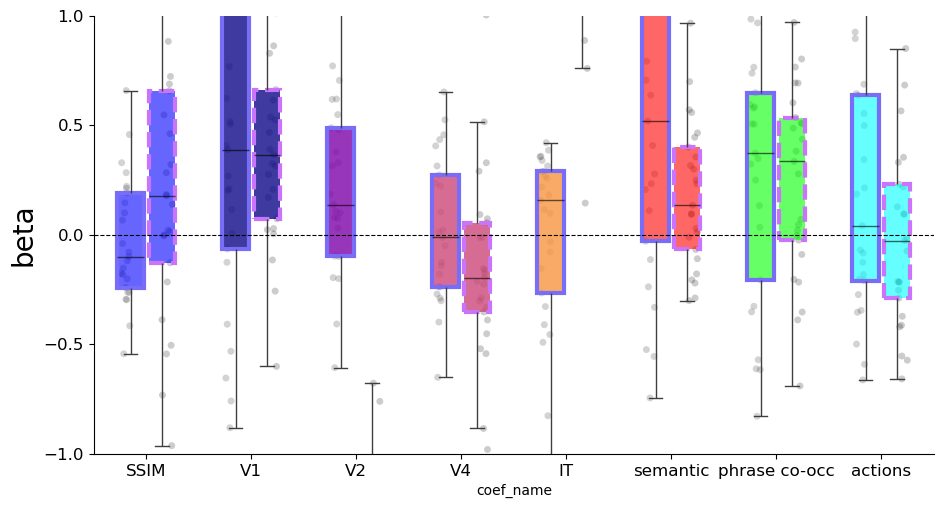

In [11]:
pred_type="orig"

all_res, avg_al, avg_la = data_for_plot(config.subject_id_clean, load_cluster("al_orig")[0][0], load_cluster("la_orig")[0][0], load_cluster("la_orig")[1][0], pred_type=pred_type)

colors = rsa.create_cols_all(5,alpha=.8)[:4]

[colors.append(x) for x in [(1, 0, 0, 0.6),(0, 1, 0, 0.6),(0, 1, 1, 0.6)]]
colors.insert(0,(0,0,1,0.6))
colors=colors*2
#5852B6
#776DF7
edgecols = list(np.repeat(["#776DF7","#C974FA"],8))
linestyles = list(np.repeat(["-","--"],8))

diff = (avg_al-avg_la)
t_, pvals, ho_ = mne.stats.permutation_t_test(diff)
print(pvals)

import seaborn as sns
fig, ax = plt.subplots(figsize = (14,6))

ax = sns.boxplot(x="coef_name", y="betas",
            hue="type", gap=.15,
            data=all_res, showfliers=False, notch=False,medianprops=dict(color="black", alpha=.6),legend=False,
            width=.6
            )

for n in range(16):
    patch=ax.patches[n]
    patch.set_facecolor(colors[n])
    patch.set_edgecolor(edgecols[n])
    patch.set_linewidth(3)
    patch.set_linestyle(linestyles[n])

rsa.add_boxplot_configs(ax)

sns.stripplot(
    data=all_res, x="coef_name", y="betas", hue="type",
    dodge=True, alpha=.2, zorder=1, legend=False, color="black"
)
#plt.ylim(-.8,.6)
#plt.yticks(np.arange(-.8,.7,.2))
plt.savefig(f"../results/plots/RSA_phrase-allinone-avgcluster-{pred_type}-PCA_{pca}-{estimator}-{language}_{h}-1.png",dpi=300)

# 3. Correlation and semipartial correlation

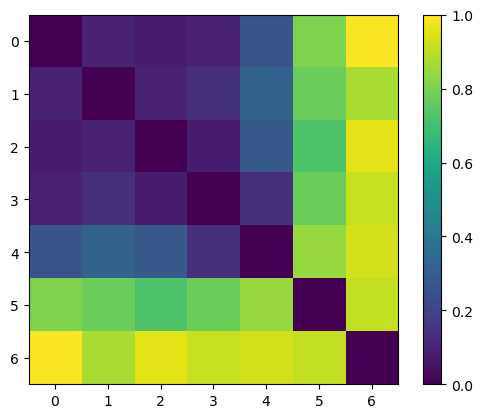

In [5]:
# plot correlation between predictors AL
corr_al = np.load("../results/rsa/preds_al_corr.npy")
plt.imshow(1-corr_al, cmap="viridis",vmin=0,vmax=1)
plt.colorbar()
plt.savefig(f"../results/plots/RSA_preds_corr-al-PCA_{pca}-{estimator}-{language}_{h}.png",dpi=300)

In [6]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr

def load_prep_corr_results(corr_type,cluster="base"):
    if corr_type=="corr":
        res_la = np.load(f"../results/rsa/correlation_la_{cluster}.npy")
        res_al = np.load(f"../results/rsa/correlation_al_{cluster}.npy")
        #names = ["SSIM","V1","V2","V4","IT","semantic","phrase co-occ","actions"]
        names = ["SSIM","V1","V2","V4","IT","semantic","actions"]
    elif corr_type=="semi":
        res_la = np.load(f"../results/rsa/semipartial_la_{cluster}.npy")
        res_al = np.load(f"../results/rsa/semipartial_al_{cluster}.npy")
        #names = ["IT","semantic","phrase co-occ","actions"]
        names = ["IT","semantic","actions"]
    elif corr_type=="semi_all":
        res_la = np.load(f"../results/rsa/semipartial_all_la_{cluster}.npy")
        res_al = np.load(f"../results/rsa/semipartial_all_al_{cluster}.npy")
        #names = ["IT","semantic","phrase co-occ","actions"]
        names = ["IT","semantic","actions"]
    
    all_res = []
    for s in range(res_la.shape[0]):
        temp_al = pd.DataFrame(res_al[s,:], columns=["r"])
        temp_al["id"] = s+1
        temp_al["coef_name"] = names
        temp_al["type"] = "AL"
        
        temp_la = pd.DataFrame(res_la[s,:], columns=["r"])
        temp_la["id"] = s+1
        temp_la["coef_name"] = names
        temp_la["type"] = "LA"
        all_res.append(pd.concat([temp_al,temp_la]))
    all_res = pd.concat(all_res)

    return all_res, res_la, res_al, names

def load_neural_rdms(subs=config.subject_id_clean):
    n_s = len(subs)
    neural_rdms_al, neural_rdms_la = rsa.load_neural_rdms(subject_id_clean=subs,prefix='../')
    times = rsa.load_cluster_times(prefix='../')    
    neural_vecs_al = []
    neural_vecs_la = []
    for n in range(n_s):
        print(f'processing subject {n+1}')
        neural_rdm_al = neural_rdms_al[n]
        neural_rdm_avg_time_al = np.mean(neural_rdm_al[:, :, times], axis=2)
        neural_rdm_la = neural_rdms_la[n]
        neural_rdm_avg_time_la = np.mean(neural_rdm_la[:, :, times], axis=2)
        neural_vec_al = neural_rdm_avg_time_al.flatten()
        neural_vec_la = neural_rdm_avg_time_la.flatten()
        neural_vecs_al.append(neural_vec_al)
        neural_vecs_la.append(neural_vec_la)
    return neural_vecs_al, neural_vecs_la

# Function to compute the upper noise ceiling
def lower_noise_ceiling(flat_rdms):
    num_subjects = len(flat_rdms)
    correlations = []
    for i in range(num_subjects):
        # Leave one subject out
        remaining_rdms = [flat_rdms[j] for j in range(num_subjects) if j != i]
        mean_rdm = np.mean(remaining_rdms, axis=0)
        
        # Correlate the mean RDM with the left-out RDM
        corr, _ = pearsonr(mean_rdm, flat_rdms[i])
        correlations.append(corr)
    
    return np.mean(correlations)

# Function to compute the lower noise ceiling
def upper_noise_ceiling(flat_rdms):
    num_subjects = len(flat_rdms)
    all_correlations = []
    for i in range(num_subjects):
        # Leave one subject out
        remaining_rdms = [flat_rdms[j] for j in range(num_subjects) if j != i]
        mean_rdm = np.mean(remaining_rdms, axis=0)
        
        # Correlate each remaining RDM with the mean RDM
        for remaining_rdm in remaining_rdms:
            corr, _ = pearsonr(remaining_rdm, mean_rdm)
            all_correlations.append(corr)
    
    return np.mean(all_correlations)


In [7]:
neural_vecs_al, neural_vecs_la = load_neural_rdms()

# Compute the upper noise ceiling
upper_nc_al = upper_noise_ceiling(neural_vecs_al)
# Compute the lower noise ceiling
lower_nc_al = lower_noise_ceiling(neural_vecs_al)

upper_nc_la = upper_noise_ceiling(neural_vecs_la)
lower_nc_la = lower_noise_ceiling(neural_vecs_la)

print("Lower Noise Ceiling AL:", lower_nc_al)
print("Upper Noise Ceiling AL:", upper_nc_al)
print("Lower Noise Ceiling LA:", lower_nc_la)
print("Upper Noise Ceiling LA:", upper_nc_la)


processing subject 1
processing subject 2
processing subject 3
processing subject 4
processing subject 5
processing subject 6
processing subject 7
processing subject 8
processing subject 9
processing subject 10
processing subject 11
processing subject 12
processing subject 13
processing subject 14
processing subject 15
processing subject 16
processing subject 17
processing subject 18
processing subject 19
processing subject 20
processing subject 21
processing subject 22
processing subject 23
processing subject 24
processing subject 25
Lower Noise Ceiling AL: 0.1908468101006426
Upper Noise Ceiling AL: 0.31271552293303634
Lower Noise Ceiling LA: 0.4718442784838331
Upper Noise Ceiling LA: 0.5254169947539414


In [10]:
import pingouin
import statsmodels

corr_type="semi_all"
cluster="base"

all_res, res_la, res_al, names = load_prep_corr_results(corr_type,cluster)

bf_al = [pingouin.ttest(res_al[:,x], y=0, r=0.707, alternative='greater') for x in range(len(names))]
bf_la = [pingouin.ttest(res_la[:,x], y=0, r=0.707, alternative='greater') for x in range(len(names))]

pval_corrected_al = statsmodels.stats.multitest.multipletests([x['p-val'][0] for x in bf_al], alpha=0.05, method='bonferroni', maxiter=1, is_sorted=False, returnsorted=False)
pval_corrected_la = statsmodels.stats.multitest.multipletests([x['p-val'][0] for x in bf_la], alpha=0.05, method='bonferroni', maxiter=1, is_sorted=False, returnsorted=False)
print(f'pvals corrected AL: {pval_corrected_al[1]},\n pvals corrected LA: {pval_corrected_la[1]}')

cohen_d_al = [x['cohen-d'][0] for x in bf_al]
cohen_d_la = [x['cohen-d'][0] for x in bf_la]
print(f'cohen d AL: {cohen_d_al},\n cohen d LA: {cohen_d_la}')

for d in cohen_d_al:
    ci_d_al = pingouin.compute_esci(d,nx=25, ny=0,paired=True,eftype='cohen',confidence=0.9,alternative='greater')
    print(ci_d_al)
print("LA")
for d in cohen_d_la:
    ci_d_la = pingouin.compute_esci(d,nx=25, ny=0,paired=True,eftype='cohen',confidence=0.9,alternative='greater')
    print(ci_d_la)



pvals corrected AL: [0.20928325 0.00938356 0.00045206],
 pvals corrected LA: [1.44515971e-09 4.31588994e-06 6.22023722e-01]
cohen d AL: [0.3056515987186114, 0.5993247984750866, 0.8441097187524484],
 cohen d LA: [1.9318271440231536, 1.2137719658947854, 0.16601316274237918]
[-0.04  0.66]
[0.23 0.97]
[0.45 1.24]
LA
[1.35 2.51]
[0.76 1.66]
[-0.18  0.51]


/var/folders/8j/h8w6skpx111fc1wp64yw19kw0000gn/T/ipykernel_13625/788042620.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_corrected_al = statsmodels.stats.multitest.multipletests([x['p-val'][0] for x in bf_al], alpha=0.05, method='bonferroni', maxiter=1, is_sorted=False, returnsorted=False)
/var/folders/8j/h8w6skpx111fc1wp64yw19kw0000gn/T/ipykernel_13625/788042620.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_corrected_la = statsmodels.stats.multitest.multipletests([x['p-val'][0] for x in bf_la], alpha=0.05, method='bonferroni', maxiter=1, is_sorted=False, returnsorted=False)
/var/folders/8j/h8

In [11]:
bf_la

[               T  dof alternative         p-val        CI95%   cohen-d  \
 T-test  9.659136   24     greater  4.817199e-10  [0.14, inf]  1.931827   
 
             BF10  power  
 T-test  2.31e+07    1.0  ,
               T  dof alternative     p-val        CI95%   cohen-d       BF10  \
 T-test  6.06886   24     greater  0.000001  [0.06, inf]  1.213772  1.352e+04   
 
            power  
 T-test  0.999989  ,
                T  dof alternative     p-val         CI95%   cohen-d   BF10  \
 T-test  0.830066   24     greater  0.207341  [-0.02, inf]  0.166013  0.576   
 
            power  
 T-test  0.200994  ]

/var/folders/8j/h8w6skpx111fc1wp64yw19kw0000gn/T/ipykernel_12473/1774171455.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


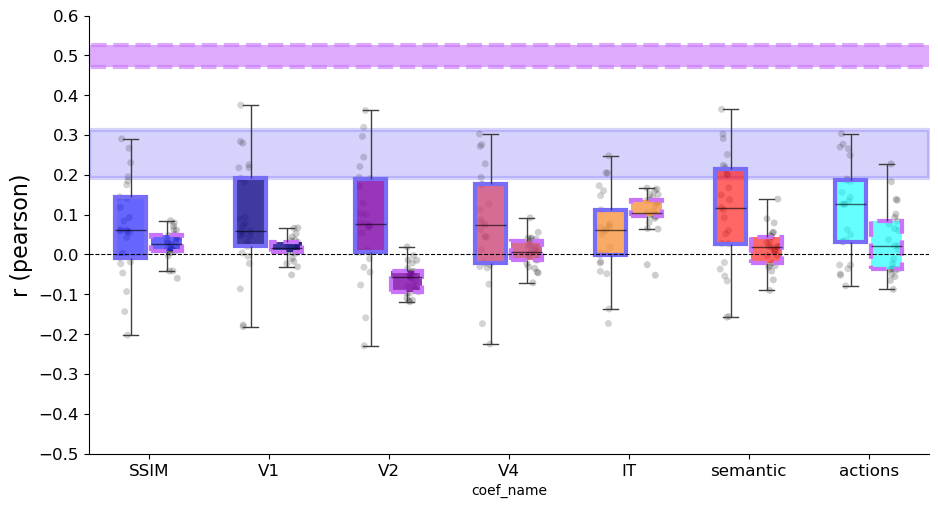

In [61]:
colors = rsa.create_cols_all(5,alpha=.8)[:4]

#[colors.append(x) for x in [(1, 0, 0, 0.6),(0, 1, 0, 0.6),(0, 1, 1, 0.6)]]
[colors.append(x) for x in [(1, 0, 0, 0.6),(0, 1, 1, 0.6)]]
colors.insert(0,(0,0,1,0.6))
if corr_type in ["semi","semi_all"]:    
    colors = colors[4:]
colors=colors*2

#5852B6
#776DF7
edgecols = list(np.repeat(["#776DF7","#C974FA"],len(names)))
linestyles = list(np.repeat(["-","--"],len(names)))

import seaborn as sns
if corr_type=="corr":
    fig, ax = plt.subplots(figsize = (14,6))
else:
    fig, ax = plt.subplots(figsize = (10,6))

ax = sns.boxplot(x="coef_name", y="r",
            hue="type", gap=.15,
            data=all_res, showfliers=False, notch=False,medianprops=dict(color="black", alpha=.6),legend=False,
            width=.6
            )
ax.fill_between(ax.get_xlim(), [upper_nc_al,upper_nc_al], [lower_nc_al,lower_nc_al], color="#776DF7", alpha=.3, linewidth=3)
ax.fill_between(ax.get_xlim(), [upper_nc_la,upper_nc_la], [lower_nc_la,lower_nc_la], color="#C974FA", alpha=.6,linewidth=3,linestyle="--")

for n in range(len(names)*2):
    patch=ax.patches[n]
    patch.set_facecolor(colors[n])
    patch.set_edgecolor(edgecols[n])
    patch.set_linewidth(3)
    patch.set_linestyle(linestyles[n])

rsa.add_boxplot_configs(ax,corr_type=corr_type)

sns.stripplot(
    data=all_res, x="coef_name", y="r", hue="type",
    dodge=True, alpha=.2, zorder=1, legend=False, color="black"
)
plt.ylabel("r (pearson)") if corr_type=="corr" else plt.ylabel("semi-partial r (pearson)")
plt.ylim(-.5,.6)#
plt.yticks(np.arange(-.5,.7,.1))
plt.savefig(f"../results/plots/RSA_{corr_type}_{cluster}.png",dpi=300)